# **Insurance Cost Analysis**


In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Task 1 : Import the dataset


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import cross_val_score, train_test_split

In [2]:
filePath = '/Users/ahmedehab/Desktop/dataAnalysis/Medical Insurance Charges Prediction/medical_insurance_dataset.csv'
df = pd.read_csv(filePath)

In [3]:
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


Add the headers to the dataframe, as mentioned in the project scenario. 


In [4]:
headers = ['age','gender','bmi','no_of_children','smoker','region','charges']
df.columns = headers
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


# Task 2 : Data Wrangling

### Identify missing values:

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of_children  2771 non-null   int64  
 4   smoker          2771 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 151.7+ KB


In [6]:
df.replace('?',np.nan,inplace=True)
df.head()

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160


<h4>Evaluating for Missing Data:</h4>


In [7]:
missing_data = df.isnull()
missing_data

,age,gender,bmi,no_of_children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...
2766,False,False,False,False,False,False,False
2767,False,False,False,False,False,False,False
2768,False,False,False,False,False,False,False
2769,False,False,False,False,False,False,False


<h4>Count missing values in each column</h4>


In [8]:
# Iterate over each column in the missing_data DataFrame
for column in missing_data.columns:
    print(f"\nValue counts for column '{column}':")
    print(missing_data[column].value_counts())
    print('-' * 40)



Value counts for column 'age':
age
False    2767
True        4
Name: count, dtype: int64
----------------------------------------

Value counts for column 'gender':
gender
False    2771
Name: count, dtype: int64
----------------------------------------

Value counts for column 'bmi':
bmi
False    2771
Name: count, dtype: int64
----------------------------------------

Value counts for column 'no_of_children':
no_of_children
False    2771
Name: count, dtype: int64
----------------------------------------

Value counts for column 'smoker':
smoker
False    2764
True        7
Name: count, dtype: int64
----------------------------------------

Value counts for column 'region':
region
False    2771
Name: count, dtype: int64
----------------------------------------

Value counts for column 'charges':
charges
False    2771
Name: count, dtype: int64
----------------------------------------


Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [9]:
# Calculate the average age
avg_age = df['age'].astype('float').mean()
print(avg_age)

# Replace NaN values in the 'age' column with the average age
df['age'].fillna(avg_age, inplace=True)


39.11709432598482


In [10]:
# Get the most common value in the 'smoker' column
is_smoker = df['smoker'].value_counts().idxmax()  # Identify the mode of the 'smoker' column

print(is_smoker) 

# Replace NaN values in the 'smoker' column with the most common value
df['smoker'].fillna(is_smoker, inplace=True)

# Convert the 'age' and 'smoker' columns to integers
df[['age', 'smoker']] = df[['age', 'smoker']].astype('int') 


0


Update the `charges` column such that all values are rounded to nearest 2 decimal places.

In [11]:
df[['charges']] = np.round(df[['charges']],2)
df.head(10)

,age,gender,bmi,no_of_children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62
5,46,1,33.440,1,0,4,8240.59
6,37,1,27.740,3,0,1,7281.51
7,37,2,29.830,2,0,2,6406.41
8,60,1,25.840,0,0,1,28923.14
9,25,2,26.220,0,0,2,2721.32


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


(0.0, 54.9885)

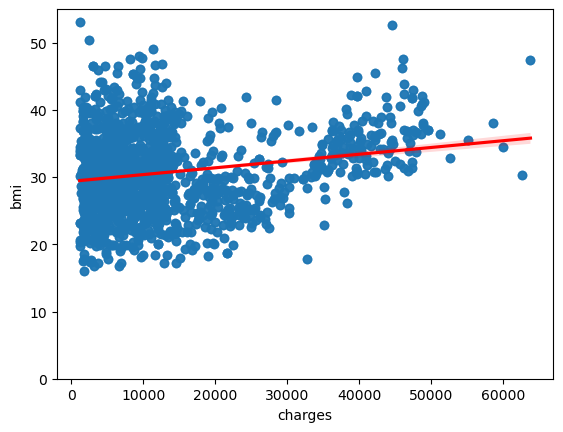

In [12]:
sns.regplot(x='charges',y='bmi',data=df,line_kws={'color':'red'})
plt.ylim(0,)

Implement the box plot for `charges` with respect to `smoker`.


<Axes: xlabel='smoker', ylabel='charges'>

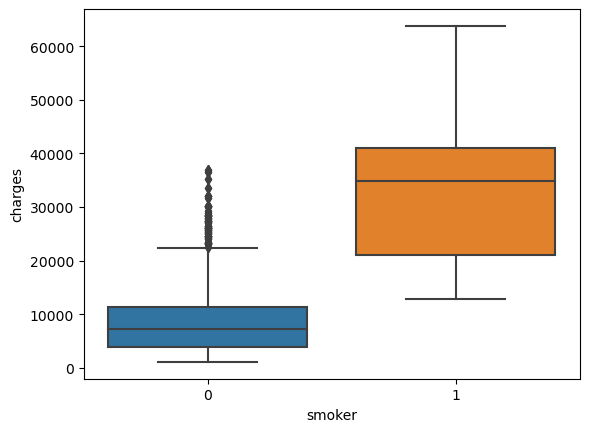

In [13]:
sns.boxplot(x='smoker',y='charges',data=df)

Print the correlation matrix for the dataset.


In [14]:
print(df.corr())

                     age    gender       bmi  no_of_children    smoker  \
age             1.000000 -0.026584  0.112859        0.037126 -0.022290   
gender         -0.026584  1.000000  0.042766        0.015693  0.083125   
bmi             0.112859  0.042766  1.000000       -0.001642  0.011824   
no_of_children  0.037126  0.015693 -0.001642        1.000000  0.007016   
smoker         -0.022290  0.083125  0.011824        0.007016  1.000000   
region         -0.006969  0.022360  0.271200       -0.025594  0.053839   
charges         0.298892  0.062959  0.199906        0.066551  0.789141   

                  region   charges  
age            -0.006969  0.298892  
gender          0.022360  0.062959  
bmi             0.271200  0.199906  
no_of_children -0.025594  0.066551  
smoker          0.053839  0.789141  
region          1.000000  0.054018  
charges         0.054018  1.000000  


# Correlation Matrix Summary

The correlation matrix displays the pairwise correlation coefficients between various variables in the dataset. Below are the key insights:

## Key Variables and Their Relationships

- **Age**
  - **Charges**: \(0.298892\) (Moderate positive correlation; as age increases, insurance charges tend to increase.)
  - **BMI**: \(0.112859\) (Weak positive correlation.)
  - **No of Children**: \(0.037126\) (Almost no correlation.)

- **Gender**
  - **Smoker**: \(0.083125\) (Very weak positive correlation; slight tendency for one gender to smoke more than the other.)
  - **Charges**: \(0.062959\) (Negligible correlation.)

- **BMI**
  - **Charges**: \(0.199906\) (Moderate positive correlation; higher BMI is associated with higher insurance charges.)
  - **Region**: \(0.271200\) (Moderate positive correlation, indicating BMI varies by region.)

- **No of Children**
  - **Charges**: \(0.066551\) (Very weak positive correlation; minimal relationship with charges.)
  - Other correlations are near zero, suggesting limited relationships with age, gender, BMI, and smoker status.

- **Smoker**
  - **Charges**: \(0.789141\) (Strong positive correlation; smokers tend to have significantly higher insurance charges.)
  - Other correlations are very low, indicating limited relationships with other variables.

- **Region**
  - **Charges**: \(0.054018\) (Negligible correlation, meaning region does not significantly impact insurance charges.)

## Summary of Insights

- **Strongest Correlation**: The strongest correlation is between `smoker` and `charges` (\(0.789141\)), indicating that smoking status is a significant predictor of insurance charges.
- **Moderate Correlations**: Age and BMI have moderate correlations with charges, making them important for predictive modeling.
- **Weak/Negligible Correlations**: Factors like gender, number of children, and region show limited impact on insurance charges compared to smoking status, age, and BMI.

## Implications

- **Feature Selection**: Consider keeping `smoker`, `age`, and `bmi` as important features in predictive models due to their correlations with `charges`.
- **Further Analysis**: The low correlations with variables like `gender`, `no_of_children`, and `region` suggest they may not be significant predictors of insurance charges in this dataset.


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [15]:
# Assuming df is your DataFrame
x = df['smoker'].values.reshape(-1, 1)  # Reshape x to 2D array
y = df[['charges']].values  # y can remain as is

lm = LinearRegression()

# Fit the model
lm.fit(x, y)

# Print the R^2 score
print(lm.score(x, y))

0.6227430402464125


A value of approximately 0.6227 means that about 62.27% of the variance in charges can be explained by the smoker variable in your model.

In [16]:
z = df[['age','gender','bmi','no_of_children','smoker','region']]

lm.fit(z,y)
print(lm.score(z,y))

0.7505888664568173



The linear regression model using multiple predictors (`age`, `gender`, `bmi`, `no_of_children`, `smoker`, and `region`) achieved an \( R^2 \) value of approximately **0.7506**. This indicates that about **75.06%** of the variance in insurance charges can be explained by these factors, demonstrating a strong relationship and good predictive power. Further improvements could be explored by investigating additional variables or interactions.


# Task 5 : Model Refinement

Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [17]:
# Prepare the features and target variable
X = df[['age', 'gender', 'bmi', 'no_of_children', 'smoker', 'region']]
y = df['charges']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with scaling, polynomial features, and linear regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly_features', PolynomialFeatures(degree=2)),
    ('lin_reg', LinearRegression())
]) 

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Evaluate the model's performance using the correct true values
r2 = r2_score(y_test, y_pred)  # Compare predicted values to actual target values
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)

print(f'R^2 Score: {r2:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'Mean Squared Error: {mse:.4f}')

R^2 Score: 0.8476
Mean Absolute Error: 2963.5138
Mean Squared Error: 24872219.0715


### Model Evaluation Metrics

#### 1. \( R^2 \) Score: **0.8476**
- **Definition**: The \( R^2 \) score, or coefficient of determination, measures the proportion of variance in the dependent variable (insurance charges) that can be predicted from the independent variables (features).
- **Interpretation**: An \( R^2 \) score of **0.8476** indicates that approximately **84.76%** of the variance in the insurance charges can be explained by the model. This suggests a strong predictive capability.

#### 2. Mean Absolute Error (MAE): **2963.5138**
- **Definition**: MAE measures the average absolute difference between predicted values and actual values.
- **Interpretation**: An MAE of **2963.51** means that, on average, the model's predictions deviate from the actual charges by about **$2963.51**. A lower MAE indicates better predictive accuracy.

#### 3. Mean Squared Error (MSE): **24872219.0715**
- **Definition**: MSE measures the average squared difference between predicted values and actual values, penalizing larger errors more than smaller ones.
- **Interpretation**: An MSE of **24,872,219.07** indicates that the average squared difference between predictions and actual charges is large. This suggests potential significant errors in predictions, especially if there are outliers in the dataset.

### Summary
- The \( R^2 \) score of **0.8476** indicates that the model explains a significant portion of the variance in the target variable.
- The MAE shows an average prediction error of about **$2963.51**.
- The MSE reflects a larger average squared error, suggesting some predictions may be significantly off, highlighting areas for potential improvement.


In [18]:
df.to_csv('refined_insurance_data.csv', index=False)
